In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import itertools
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models import Word2Vec
from datetime import datetime
from sklearn.base import TransformerMixin
from sklearn.svm import OneClassSVM

import spacy
import logging

logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.CRITICAL)
logging.root.level = logging.CRITICAL  # ipython sometimes messes up the logging setup; restore
# logging.StreamHandler(sys.stdout)

In [3]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [4]:
%matplotlib inline
#NB I open a standard set of directories

#Paths

#Get the top path
top_path = os.path.dirname(os.getcwd())

#Create the path for external data
ext_data = os.path.join(top_path,'data/external')

#Raw path (for html downloads)

raw_data = os.path.join(top_path,'data/raw')

#And external data
proc_data = os.path.join(top_path,'data/processed')

fig_path = os.path.join(top_path,'reports/figures')

#Get date for saving files
today = datetime.utcnow()

today_str = "_".join([str(x) for x in [today.month, today.day, today.year]])

## Text Pipeline Recipes

### General Approach
1. Clean text - remove unwanted chars etc.
2. Parse with spacy
3. Generate features

In [5]:
nlp = spacy.load('en_core_web_sm')

We're going to add some more stop words to the spaCy model.

In [9]:
with open('../data/external/en_ranknl_long.txt', 'r') as f:
    text = f.read()
stop_words = text.split('\n')

## Importing and Processing

In [14]:
health_grants_df = pd.read_csv('../data/health_research_grants_2018_04_23_1436.csv')

In [15]:
health_grants_df.head(2)

,agency_name,lad13nm,participant_name,project_start_date,project_title,public_description,dataset_id,project_id,paragraph_vectors,year,grants_funding,project_start_datetime
0,Health Resources and Services Administration,NaN,NaN,"Apr 03, 2013",Ryan White HIV/AIDS Program Part D Grants for ...,This announcement solicits applications for fi...,grants_gov,HRSA-13-264,[-0.35462067 -0.41949466 -0.27364257 -0.659733...,2013.0,NaN,2013-04-03
1,Health Resources and Services Administration,NaN,NaN,"Jan 30, 2012",Ryan White HIV/AIDS Program Part D Grants for ...,The purpose of this funding opportunity announ...,grants_gov,HRSA-12-073,[-0.58284324 -0.42862821 -0.52920008 -0.820197...,2012.0,70000000.0,2012-01-30


#### Utility Functions

In [16]:
def flatten(l):
    return [item for sublist in l for item in sublist]

### Parsing

In [17]:
class SpacyParser(TransformerMixin):
    def __init__(self, spacy_model, **pipe_kwargs):
        self.spacy_model = spacy_model
        self.pipe_kwargs = pipe_kwargs
        
    def fit(self, texts, *args):
        return self
    
    def transform(self, texts, *args):
        pipe_kwargs = self.pipe_kwargs
        spacy_model = self.spacy_model
        docs = [spacy_model(text) for text in texts]
        return docs

In [18]:
descriptions = health_grants_df['public_description'].values

In [22]:
from nlp_tools import CleanText

In [23]:
cleaner = CleanText()
descriptions_clean = cleaner.transform(descriptions) 

In [24]:
sp = SpacyParser(nlp)
# Takes around 30 mins
# Load processed data instead unless updating processing steps
docs = sp.transform(descriptions_clean)

**Two corpora - one for exploration and one for topic modelling**
- Remove stop words
- Remove high and low frequency words
- Remove punctuation

**Exploration**
- Remove all digits

**Topic Modelling**
- Part of speech tagging
- Remove punctuation
- Transform into sub-corpora of - tokens, lemmas, part of speech

**For both after preprocessing**
- Generate ngram transformed corpus
- Generate phrase transformed corpus
- Generate combined corpus?

In [321]:
Token.set_extension('replace_by', default='', force=True)

In [323]:
t1._.replace_by = '#'

In [324]:
t1._.replace_by

'#'

In [333]:
from spacy.matcher import PhraseMatcher

In [341]:
t.has_extension('to_remove')

True

In [345]:
Token.set_extension('replace_by', default=None)

In [353]:
def remove_tokens(docs, indexes):
    for doc, token_indexes in zip(docs, indexes):
        continue

def set_remove(token):
    token._.to_remove = True
    return token

def set_replace(token, replacement):
    if token._.replace_by:
        return token
    else:
        token._.replace_by = replacement
        return token

principle is that we only yield the transformations to the tokens

In [367]:
texts = ['Hi I am George',
         'I love the beach']

In [368]:
ds = [nlp(d) for d in texts]

In [369]:
indexes = [[1, 3], [1, 4]]

In [381]:
def tag_removers(indexes):
     return [[set_remove] * len(i) for i in indexes]

In [382]:
do_it = tag_removers(indexes)

In [ ]:
def execute(taggers)

In [384]:
ds[0][1]._.to_remove

False

In [356]:
tokens = [d[0], d[1], d[2]]

In [366]:
for c, t in zip(b, tokens):
    c(t)

This
announcement
solicits


In [364]:
d[2]._.to_remove

True

In [ ]:
taggers = [
    ('bt', BooleanTagger, 'remove'),
    ('mt', MatchTagger, 'replace', 'URL')
]

for tagger in taggers:
    if len(tagger) == 3:                                          
        
        _, tagger, action = tagger
    elif len(tagger) == 4:
        _, tagger, action, replacement = tagger
    
    tagger.tag(docs)
    
    for token_indexes in enumerate(tagger.indexes):
            yield [set_remove()] * len(token_indexes)
    

In [309]:
from spacy.tokens.token import Token

In [ ]:
Token.text

In [ ]:
class Pipeline():
    
    def __init__(self, taggers):
        
        Token.set_extension('to_remove', default=False)
        Token.set_extension('replace_by', default='')
        self.taggers = taggers
        
    def tag(self, docs):
        self.taggers
        for tagger in self.taggers:
            tagger.tag(docs)
        return self
            
    

In [ ]:
class Builder():
    

### Tokenization

In [25]:
from nlp_tools import SpacyTokenizer

In [40]:
tokenizer = SpacyTokenizer(remove_stop=True, remove_numbers=True, remove_brackets=True, ascii_only=True, min_length=1)

In [44]:
tokens = tokenizer.transform(docs)

### Lemmatization

In [45]:
from nlp_tools import SpacyLemmatizer

In [46]:
lemmatizer = SpacyLemmatizer()

In [47]:
lemmas = lemmatizer.transform(docs)

### Saving / Loading Processed Text

Saving the processed documents back into the original dataframe and exporting means we shouldn't have to run the spaCy parsing process again, unless we need to significantly change some of our preprocessing choices.

In [184]:
health_grants_df['description_tokens'] = tokens
health_grants_df['description_lemmas'] = lemmas
health_grants_df['description_token_trigrams'] = trigrams

In [6]:
# health_grants_df.to_csv(proc_data + '/health_research_grants_{}.csv'.format(today_str), index=False)
health_grants_df  = pd.read_csv(proc_data + '/health_research_grants_4_26_2018.csv')

In [7]:
import ast

In [8]:
tokens = health_grants_df['description_tokens']
tokens = [ast.literal_eval(x) for x in tokens]

In [9]:
lemmas = health_grants_df['description_lemmas']
lemmas = [ast.literal_eval(x) for x in lemmas]

### NGrams

In [36]:
from nlp_tools import GensimNGrammer

In [37]:
ngrammer = GensimNGrammer(**{'threshold': 50, 'min_count':25})

In [38]:
trigrams = ngrammer.transform(tokens)

In [14]:
# trigrams = health_grants_df['description_token_trigrams']
# trigrams = [ast.literal_eval(x) for x in trigrams]

In [39]:
trigrams_only = []
for trigram_phrase, token_phrase in zip(trigrams, tokens):
    trigrams_only.append([t for t in trigram_phrase if t not in token_phrase])

In [40]:
from collections import Counter

In [45]:
trigram_counts = Counter(flatten(trigrams_only))

#### Most Common N-Grams

High count ngrams contain fairly generic phrases for the corpus as expected, such as "long_term" and "clinical_trials". The only illness specific term that is present is "hiv_aids".

In [500]:
trigram_counts.most_common(20)

[('long_term', 4793),
 ('in_addition', 3556),
 ('  _description_provided_applicant', 2780),
 ('funding_opportunity_announcement_foa', 2462),
 ('clinical_trials', 2438),
 ('decision_making', 2253),
 ('cooperative_agreement', 2223),
 ('united_states', 2192),
 ('hiv_aids', 1882),
 ('quality_improvement', 1793),
 ('national_park_service', 1770),
 ('technical_assistance', 1704),
 ('clinical_trial', 1674),
 ('state_art', 1579),
 ('career_development', 1553),
 ('for_example', 1474),
 ('wide_range', 1455),
 ('real_time', 1428),
 ('   _description_provided_applicant', 1397),
 ('comparative_effectiveness', 1396)]

The ngrams with low counts seem to have a mixture of administrative, and generic terms, however they also contain some phrases related to specific communities, such as "gay_bisexual" and "runaway_homeless".

In [59]:
trigram_counts_low = Counter({k: v for k, v in trigram_counts.items() if v <= 5})
trigram_counts_low.most_common(20)

[('gay_bisexual', 5),
 ('section_330(e_migrant', 5),
 ('refugee_resettlement', 5),
 ('www_grants.gov', 5),
 ('received_recommended', 5),
 ('completion_objectives', 5),
 ('please_review', 5),
 ('center_chc', 5),
 ('description_provided', 5),
 ('runaway_homeless', 5),
 ('scope_pa-09', 5),
 ('procedures_followed', 5),
 ('beneficiary_base', 5),
 ('size_duration', 5),
 ('resistance_amr', 5),
 ('traumatic_brain', 5),
 ('department_ed', 5),
 ('assistance_act_amended', 5),
 ('perform_activity', 5),
 ('other_federally_recognized_indian', 5)]

About 1200 of the articles contain none of the ngrams.

In [60]:
sum([1 for t in trigrams_only if len(t) == 0])

1203

In [151]:
tokens_no_trigrams = [tok for tok, tri in zip(tokens, trigrams_only) if len(tri) == 0]

In [179]:
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool, PanTool, BoxZoomTool, ResetTool, WheelZoomTool

In [100]:
trigram_counts_cds = ColumnDataSource(pd.DataFrame({'ngram': [k for k, v in trigram_counts.items()],
                                       'count': [v for k,v in trigram_counts.items()]}).sort_values('count', ascending=False))

In [118]:
hover = HoverTool(tooltips=[
    ("N-Gram", "@ngram"),
    ("Count", "@count"),
],
                 mode='vline')
box = BoxZoomTool(dimensions='width')
reset = ResetTool()

trigrams_bar = figure(width=1000, height=400, x_range=trigram_counts_cds.data['ngram'], tools=[hover, box, reset],
                     title='N-Gram Counts', x_axis_label='N-Gram', y_axis_label='Count')
trigrams_bar.vbar(x='ngram', top='count', source= trigram_counts_cds, width=0.9)
trigrams_bar.xgrid.visible = False
trigrams_bar.ygrid.visible = False
trigrams_bar.xaxis.major_label_text_font_size = '0pt'
trigrams_bar.xaxis.major_tick_line_color = None

show(trigrams_bar)

The bar chart of all the n-gram frequencies shows a roughly exponential distribution. A small fraction of terms occur more than 2000 times, with the vast majority occuring less than 200 times in the corpus. Although this give an idea of the overall distribution, it is not very useful for exploring the kinds of information captured by the n-grams.

#### N-Gram Word Vectors

In [147]:
w2v = Word2Vec(trigrams, size=2, min_count=4)
kv = w2v.wv
del(w2v)

In [150]:
kv_trigrams = {k: kv[k] for k, _ in kv.vocab.items() if '_' in k}

In [161]:
w2v_trigram_df = pd.DataFrame(kv_trigrams).transpose().reset_index()
w2v_trigram_df.rename(columns={'index': 'ngram', 0: 'wv_0', 1: 'wv_1'}, inplace=True)

In [184]:
w2v_trigram_df['count'] = w2v_trigram_df['ngram'].map(trigram_counts)
w2v_trigram_df = w2v_trigram_df[(w2v_trigram_df['count'] > 100) & (w2v_trigram_df['count'] < 2000)]
w2v_trigram_df['count_sq_root'] = np.power(w2v_trigram_df['count'], 1/2)

In [463]:
trigram_counts_cds = ColumnDataSource(w2v_trigram_df)

In [464]:
from bokeh.models import LinearColorMapper

In [482]:
from bokeh.palettes import Viridis256
Viridis256.reverse()

In [498]:
hover = HoverTool(tooltips=[
    ("N-Gram", "@ngram"),
    ("Count", "@count"),
])
box = BoxZoomTool()
reset = ResetTool()
zoom = WheelZoomTool()
color_mapper = LinearColorMapper(palette=Viridis256, low=min(w2v_trigram_df['count_sq_root']), high=max(w2v_trigram_df['count_sq_root']))

tigrams_wv_scatter = figure(width=1000, height=500, tools=[hover, box, reset, zoom],
                     title='N-Grams Frequencies in word2vec Space', x_axis_label='wv_0', y_axis_label='wv_1')
tigrams_wv_scatter.circle(x='wv_0', y='wv_1', source=trigram_counts_cds, alpha=0.8,
                          color={'field': 'count_sq_root', 'transform': color_mapper},
                          size=5
                         )
tigrams_wv_scatter.xgrid.visible = False
tigrams_wv_scatter.ygrid.visible = False


show(tigrams_wv_scatter)

Here, we have trained two-dimensional word vectors on the corpus, including n-grams. After filtering out unigrams, and n-grams with a corpus frequency of more than 2000 and less than 100, the remaining terms are plotted in the scatter graph above in the word vector space. The sizes of the points are equal to the square root of their corpus frequencies.

Using the hover tool, we can see that positive extremes on the horizontal axis include more general terms such as "national_institutes" and "immune_system". As we move to the left, we see that more specific terms start to become present, with a general trend towards less frequent n-grams. Another interesting characteristic is a vertical split, with more administrative and institutional terms appearing in the positive vertical space, and health related terms appearing in the negative space. This is more prevalent in the two distinct arms of the scatter plot, and is less discernible as *wv_0* becomes smaller.

## Topic Modelling

In [69]:
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LsiModel, LdaModel

In [239]:
id2word_token = Dictionary(tokens)

In [240]:
id2word_token.filter_extremes(no_below=4, no_above=0.1)

In [241]:
token_bow = [id2word_token.doc2bow(token_doc) for token_doc in tokens]

We will need to test coherence for the number of topics, so let's write a function to search this space for us. The two functions below do this for both LSI and LDA.

In [74]:
from gensim.sklearn_api import LdaTransformer

In [84]:
def lsi_coherence_search(bow, id2word, tfidf_model, original_text, num_topics_range=[10]):
    n_topics = []
    coherences = []
    for n in num_topics_range:
        lsi_model = gensim.models.LsiModel(tfidf_model[bow], id2word=id2word, num_topics=n)
        coherence_model = CoherenceModel(model=lsi_model, texts=original_text, coherence='c_v')
        n_topics.append(n)
        coherences.append(coherence_model.get_coherence())
    return n_topics, coherences


def lda_coherence_search(bow, id2word, original_text, num_topics_range=[10]):
    n_topics = []
    coherences = []
    for n in num_topics_range:
        lda_model = gensim.models.LdaModel(bow, id2word=id2word, num_topics=n)
        coherence_model = CoherenceModel(model=lda_model, texts=original_text, coherence='c_v')
        n_topics.append(n)
        coherences.append(coherence_model.get_coherence())
    return n_topics, coherences

num_topics_range_default = [10, 20, 50, 100, 200, 500]

### LDA

First let's choose a number of topics for our LDA model using our topic coherence search function.

In [85]:
lda_n_topics, lda_coherences = lda_coherence_search(token_bow, id2word_token, tokens, num_topics_range=num_topics_range_default)

/Users/grichardson/miniconda3/envs/rwjf/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


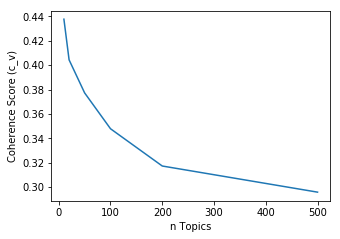

In [87]:
fig, ax = plt.subplots(1, figsize=(5, 3.5))
ax.plot(num_topics_range_default, lda_coherences)
ax.set_xlabel('n Topics')
ax.set_ylabel('Coherence Score (c_v)')
plt.savefig(fig_path + '/lda_topic_coherence_grants_gov_descriptions_trigrammed.pdf')

From this, we're going to pick 300 as the number of topics. This seems to satisfy the tradeoff between fitting time, interpretability, and topic coherence.

Now we can train an actual model and examine the topics.

In [242]:
lda_model = gensim.models.LdaModel(corpus=token_bow, id2word=id2word_token, num_topics=300)

/Users/grichardson/miniconda3/envs/rwjf/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


#### PyLDAvis Visualisation

In [210]:
import pyLDAvis.gensim

In [277]:
lda_vis = pyLDAvis.gensim.prepare(lda_model, token_bow, id2word_token)
pyLDAvis.save_html(lda_vis, fig_path+'/grants_gov_{date}_lda_viz.html'.format(date=today_str))

/Users/grichardson/miniconda3/envs/rwjf/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


#### Exploring Topics

In [320]:
def get_topic_words(model, n_topics, n_words=5):
    """Returns a list of tuples containing top n words from each topic.
    """
    topics = model.show_topics(num_topics=n_topics, num_words=n_words, formatted=False)
    topic_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in topics]
    return topic_words

In [418]:
def get_topic_token_scores(model, n_topics, n_words=5):
    """Returns a list of tuples containing top n words from each topic.
    """
    topics = model.show_topics(num_topics=n_topics, num_words=n_words, formatted=False)
    topic_scores = [(tp[0], {wd[0]: wd[1] for wd in tp[1]}) for tp in topics]
    return topic_scores

In [321]:
topic_words = get_topic_words(lda_model, 300)

In [419]:
topic_scores = get_topic_token_scores(lda_model, 300)

In [442]:
tokens_total_length = len(flatten(tokens))

In [445]:
token_scores = {}
for topic in topic_scores:
    _, topic = topic
    for t, s in topic.items():
        if t in token_scores:
            token_scores[t]['score'] = token_scores[t]['score'] + s
        else:
            token_scores[t] = {}
            token_scores[t]['score'] = s
            token_scores[t]['probability'] = token_counts[t] / tokens_total_length

In [451]:
token_prob_scores_cds = ColumnDataSource(pd.DataFrame(token_scores).transpose().reset_index().rename(columns={'index': 'token'}))

In [454]:
hover = HoverTool(tooltips=[
    ("Token", "@token"),
])
box = BoxZoomTool()
reset = ResetTool()
zoom = WheelZoomTool()

token_prob_scores_scatter = figure(width=1000, height=500, tools=[hover, box, reset, zoom],
                            title='Token Topic Model Scores by Probability',
                            x_axis_label='Probability in Corpus', y_axis_label='Topic Model Score')
token_prob_scores_scatter.circle(x='probability', y='score', source=token_prob_scores_cds,
                          alpha=0.5)

show(token_prob_scores_scatter)

#### Word2Vec Tokens

In [256]:
token_counts = Counter(flatten(tokens))
w2v_tokens = Word2Vec(tokens, size=2, min_count=4)

kv_tokens = w2v_tokens.wv
del(w2v_tokens)

In [255]:
kv_topic_tokens = {k: kv[k] for k, _ in kv.vocab.items() if k in unique_topic_words}
w2v_token_df = pd.DataFrame(kv_topic_tokens).transpose().reset_index()
w2v_token_df.rename(columns={'index': 'token', 0: 'wv_0', 1: 'wv_1'}, inplace=True)

In [267]:
w2v_token_df['count'] = w2v_token_df['token'].map(token_counts)
w2v_token_df = w2v_token_df[(w2v_token_df['count'] > 100) & (w2v_token_df['count'] < 2000)]
w2v_token_df['count_scaled'] = w2v_token_df['count'] / 100

In [272]:
token_counts_cds = ColumnDataSource(w2v_token_df)

In [496]:
color_mapper = LinearColorMapper(palette=Viridis256, low=min(w2v_token_df['count_scaled']), high=max(w2v_token_df['count_scaled']))

hover = HoverTool(tooltips=[
    ("Token", "@token"),
    ("Count", "@count"),
])
box = BoxZoomTool()
reset = ResetTool()
zoom = WheelZoomTool()

tokens_w2v_scatter = figure(width=1000, height=500, tools=[hover, box, reset, zoom],
                            title='Topic Model Token Frequencies in word2vec Space',
                            x_axis_label='wv_0', y_axis_label='wv_1')
tokens_w2v_scatter.circle(x='wv_0', y='wv_1', source=token_counts_cds,
                          color={'field': 'count_scaled', 'transform': color_mapper}, 
                          alpha=0.8,
                          size=5)
tokens_w2v_scatter.xgrid.visible = False
tokens_w2v_scatter.ygrid.visible = False


show(tokens_w2v_scatter)

Using the hover tool, we can see that positive extremes on the horizontal axis include more general terms such as "partnerships" and "infected". Again, we also see this vertical splitting between more health oriented and adminstrative terms.

Here the sizes of the points are directly proportional to the frequency of the tokens in the documents.

#### Sent2Vec

In [501]:
from gensim.models import Doc2Vec

In [ ]:
Doc2Vec(documents, size=100, window=8, min_count=5, workers=4)

### LDA With N-Grams Only

In [204]:
id2word_token_trigram = Dictionary(trigrams)

In [205]:
id2word_token_trigram.filter_extremes(no_below=4, no_above=0.1)

In [206]:
token_trigram_bow = [id2word_token_trigram.doc2bow(tri_doc) for tri_doc in trigrams]

In [76]:
lda = LdaTransformer(id2word=id2word_token_trigram)

In [85]:
lda_n_topics, lda_coherences = lda_coherence_search(token_trigram_bow, id2word_token_trigram, trigrams, num_topics_range=num_topics_range_default)

/Users/grichardson/miniconda3/envs/rwjf/lib/python3.6/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


### LSI

#### TfIdf

In [72]:
tfidf_model = gensim.models.TfidfModel(token_trigram_bow, id2word=id2word_token_trigram)

In [76]:
n_topics, coherences = lsi_coherence_search(token_trigram_bow, id2word_token_trigram,
                                            tfidf_model, trigrams, num_topics_range=num_topics_range)

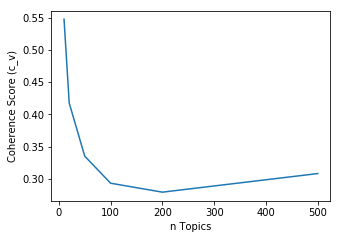

In [185]:
fig, ax = plt.subplots(1, figsize=(5, 3.5))
ax.plot(n_topics, coherences)
ax.set_xlabel('n Topics')
ax.set_ylabel('Coherence Score (c_v)')
plt.savefig(fig_path + '/lsi_topic_coherence_grants_gov_descriptions_trigrammed.pdf')


In [186]:
lsi_model = gensim.models.LsiModel(tfidf_model[token_trigram_bow], id2word=id2word_token_trigram, num_topics=200)
vectors = lsi_model[token_trigram_bow]

In [188]:
lsi_vectors = gensim.matutils.corpus2dense(vectors, num_terms=200).transpose()

In [193]:
lsi_vectors_df = pd.DataFrame(lsi_vectors)
for c in lsi_vectors_df.columns:
    lsi_vectors_df.rename(columns={c: str(c)}, inplace=True)

### Outlier Detection

In [138]:
ocsvm = OneClassSVM()

In [139]:
one_class = ocsvm.fit(lsi_vectors_df)

In [140]:
one_class = one_class.predict(lsi_vectors_df)

In [143]:
lsi_vectors_df['one_class'] = one_class

In [144]:
lsi_vectors_df_sample = lsi_vectors_df.sample(frac=0.1)

In [182]:
from bokeh.plotting import figure

In [163]:
cds = ColumnDataSource(lsi_vectors_df_sample)

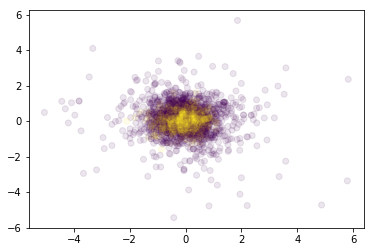

In [153]:
ax = plt.scatter(lsi_vectors_df_sample[99], lsi_vectors_df_sample[101],
                 c=lsi_vectors_df_sample['one_class'], alpha=0.1)

### Phrasing

In [6]:
class PhraseProcessor(BaseEstimator, TransformerMixin):
    """Transformer that turns documents in string form
    into token lists, with various processing steps applied.
    
    Parameters
    ----------
    pos_tags : bool, required
        Whether to tag words with their part of speech labels.
    lemmatize : bool, required
        Whether to lemmatize tokens.
    stop_words : book, required
        Whether to remove stop words.
    """
    
    def __init__(self, stop_words):
        self.stop_words = stop_words
    
    def parse_phrases(self, doc):
        '''Return a list of lists, with each sublist containing a token from the text,
        it's parent token and it's grandparent token. Does not return any repeat tokens
        in each phrase.'''
        phrases = []
        for d in doc:
            if not d.is_punct:
                if d.head != d:
                    if d.head.head != d.head:
                        phrases.append([d, d.head, d.head.head])
                    else:
                        phrases.append([d, d.head])
        return phrases

    def join_phrases(self, phrases):
        joined = []
        for phrase in phrases:
            tokens = []
            for token in phrase:
                if isinstance(token, spacy.tokens.token.Token):
                    tokens.append(token.lemma_)
                else:
                    tokens.append(token)
            if len(tokens) < 2:
                continue
            joined.append('_'.join(tokens))
        return joined
    
    def single_string(self, texts):
        strings = [' '.join(t) for t in texts]
        return strings
    
    def fit(self, texts, *args):
        return self
    
    def transform(self, docs, *args):
#         import pdb; pdb.set_trace()
#         docs = [nlp(t) for t in texts]
        phrases = [self.parse_phrases(d) for d in docs]
        joined = [self.join_phrases(p) for p in phrases]
        text = self.single_string(joined)
        return text

In [ ]:
class RegexReplacer(TransformerMixin):
    def __init__(self, replace={}):
        self.replace = replace
        
    def fit(self, texts, *args):
        return self
    
    def

In [176]:
texts = [['the', 'mayor', 'of', 'new', 'york'],
         ['going', 'to', 'new', 'york', 'tomorrow'],
         ['i', 'love', 'new', 'york'],
         ['new', 'york', 'is', 'the', 'best'],
         ['the', 'pizza', 'in', 'new', 'york', 'is', 'ok'],
         ['the', 'mayor', 'of', 'new', 'york', 'is', 'rich']]

In [ ]:
clean > tokenize/lemmatize > stopword removal > ngrammer/phrasing > topic_modelling

In [ ]:
class POSProcessor(BaseEstimator, TransformerMixin):
    """Transformer that labels tokens in a document with their
    part of speech tags.
    Parameters
    ----------
    pos_tags : bool, required
        Whether to tag words with their part of speech labels.
    lemmatize : bool, required
        Whether to lemmatize tokens.
    stop_words : book, required
        Whether to remove stop words.
    """

    def __init__(self, stop_words, pos_tags=True,
                rejoin=True):
        self.stop_words = stop_words
        self.pos_tags = pos_tags
        self.rejoin = rejoin

    def tag_pos(self, text):
        return [(t, t.pos_) for t in text]

    def get_lemmas(self, text):
        return [t[0].lemma_ for t in text]

    def remove_noise(self, text):
        noise_tags = ['DET', 'NUM', 'SYM']
        text = [t for t in text if t[0].text not in self.stop_words]
        text = [t for t in text if len(t[0]) > 2]
        text = [t for t in text if t[1] not in noise_tags]
        text = [t for t in text if ~t[0].like_num]
        return text

    def join_pos_lemmas(self, pos, lemmas):
        return ['{}_{}'.format(l, p[1]).lower() for p, l
                in zip(pos, lemmas)]

    def fit(self, texts, *args):
        return self

    def single_string(self, texts):
        strings = [' '.join(t) for t in texts]
        return strings

    def transform(self, texts, *args):
        docs = [nlp(sent) for sent in texts]
        docs = [self.tag_pos(d) for d in docs]
        docs = [self.remove_noise(d) for d in docs]
        lemmas = [self.get_lemmas(d) for d in docs]
        if self.pos_tags:
            docs = [self.join_pos_lemmas(d, l) for d, l
                    in zip(docs, lemmas)]
        if self.rejoin:
            docs = self.single_string(docs)
        return docs

        text = [t for t in text if t[0].text not in self.stop_words]
        text = [t for t in text if len(t[0]) > 2]
        text = [t for t in text if t[1] not in noise_tags]
        text = [t for t in text if ~t[0].like_num]
        return text

    def join_pos_lemmas(self, pos, lemmas):
        return ['{}_{}'.format(l, p[1]).lower() for p, l
                in zip(pos, lemmas)]

    def fit(self, texts, *args):
        return self

    def single_string(self, texts):
        strings = [' '.join(t) for t in texts]
        return strings

    def transform(self, texts, *args):
        docs = [nlp(sent) for sent in texts]
        docs = [self.tag_pos(d) for d in docs]
        docs = [self.remove_noise(d) for d in docs]
        lemmas = [self.get_lemmas(d) for d in docs]
        if self.pos_tags:
            docs = [self.join_pos_lemmas(d, l) for d, l
                    in zip(docs, lemmas)]
        if self.rejoin:
            docs = self.single_string(docs)
        return docs
